# Classification (as opposed [Simple Lineal Model / Multiple Linear] Regression)

- Machine Learning (Predictive Modeling)
    - Predictive Modeling refers to both classification and regression
    - It generally would refer to Machine Learning (more than statistical modeling); but, when you do, e.g., Multiple Linear Regression you are also doing predictive modeling (although you may be more focussed on model interpretation... which is the nice thing that you can do with SLR/MLR)

In [1]:
import pandas as pd
amazonbooks = pd.read_csv("amazonbooks.csv", encoding="ISO-8859-1")
amazonbooks

,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight_oz
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,8.0,5.2,1.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,Where the Sidewalk Ends,Shel Silverstein,18.99,12.24,H,192.0,HarperCollins,2004.0,60572345,9.3,6.6,1.1,24.0
321,White Privilege,Paula S. Rothenberg,27.55,27.55,P,160.0,Worth Publishers,2011.0,1429233443,9.1,6.1,0.7,8.0
322,Why I wore lipstick,Geralyn Lucas,12.95,5.18,P,224.0,St Martin's Griffin,2005.0,031233446X,8.0,5.4,0.7,6.4
323,"Worlds Together, Worlds Apart: A History of th...",Robert Tignor,97.50,97.50,P,480.0,W. W. Norton & Company,2010.0,393934942,10.7,8.9,0.9,14.4


Previously, we predicted/modeled a continuous real-valued outcome:

```python
import statsmodels.formula.api as smf
fit_model = smf.ols(formula='Q("Amazon Price") ~ Q("List Price") + Height + Width + C(Hard_or_Paper)', 
                    data=amazonbooks).fit()
```

In [5]:
pd.get_dummies(amazonbooks["Hard_or_Paper"])

,H,P
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
320,1,0
321,0,1
322,0,1
323,0,1


In [7]:
amazonbooks['Hardback'] = pd.get_dummies(amazonbooks["Hard_or_Paper"])['H']

In [17]:
# scikit-learn: THE ML (machine learning) page 
from sklearn.linear_model import LinearRegression


# X features (ML) [covariates in stats]; y is the outcome
# X = amazonbooks[["List Price","Height","Width","Hard_or_Paper"]] # fixed with pd.get_dumies up above
amazonbooks_selectfeatures_nonans = amazonbooks[['Amazon Price',"List Price","Height","Width","Hardback"]].dropna()
X = amazonbooks_selectfeatures_nonans[["List Price","Height","Width","Hardback"]] # now X is fully numeric
# so we won't get this error: `ValueError: could not convert string to float: 'P'`
y = amazonbooks_selectfeatures_nonans['Amazon Price']
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_ # all sklearn gives is y-hats
# sklearn does not give any statistical analysis... because
# sklearn is a machine learning library only concerned with prediction...
# not statistical analysis...

(-0.6949418720658613,
 array([ 0.84629319, -0.33262274,  0.23157493, -2.03048415]))

In [21]:
# all sklearn does is fit a model so that I can make predicitons with it
reg.predict(X)

array([  8.94375967,  10.47908707,  -0.98208118,  11.29965569,
        23.6602081 ,  20.27334147,  12.83332752,  10.49929663,
        25.20689433,  20.95227089,  12.31187939,  12.10093998,
        13.05711105,  14.62676683,  31.58273634,  11.99331105,
         3.08328397,  10.58897867,   4.37314191,   9.37973468,
         8.96586477,   7.80564373,   9.6963705 ,  10.5336113 ,
        15.55616094,  10.50940141,  13.08154325,   2.56770907,
        10.54371608,  10.50034902,   2.94916876,   9.33931556,
        14.82044461,   9.70942321,  22.69981439,   7.92584871,
         8.78637352,   9.63089834,  10.57592596,   0.56413731,
         8.89639229,   9.69801234,  16.75806755,  18.46134816,
        10.52350652,   3.64301639,   3.06197692,   9.65405584,
        18.61527835,  16.01892663,  11.30222276,  11.26766102,
        11.05859681,  10.51950619,   5.32634046,   4.54700108,
        10.08810526,  13.1193953 ,  95.25009017,  38.52549701,
        11.34664221,  11.34664221,  13.13501508,  71.57

In [18]:
import statsmodels.formula.api as smf
fit_model = smf.ols(formula='Q("Amazon Price") ~ Q("List Price") + Height + Width + (Hard_or_Paper=="H")', 
                    data=amazonbooks).fit()
fit_model.params

Intercept                      -0.694942
Hard_or_Paper == "H"[T.True]   -2.030484
Q("List Price")                 0.846293
Height                         -0.332623
Width                           0.231575
dtype: float64

In [19]:
# sklearn doesn't do any of this statistical analysis
fit_model.summary()
# because sklearn is machine learning (predictive model)
# it's not stats analysis -- sklearn doesn't care about stats analysis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Q("Amazon Price")   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     799.5
Date:                Tue, 09 May 2023   Prob (F-statistic):          3.32e-163
Time:                        15:00:25   Log-Likelihood:                -873.34
No. Observations:                 319   AIC:                             1757.
Df Residuals:                     314   BIC:                             1776.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.6949      2.232     -0.311      0.756      -5.087       3.697
Hard_or_Paper == "H"[T.True]    -2.0305      0.498     -4.081      0.000      -3.009      -1.051
Q("List Price")                  0.8463      0.018     46.533      0.000       0.811       0.882
Height                          -0.3326      0.289     -1.151      0.251      -0.901       0.236
Width                            0.2316      0.306      0.756      0.450      -0.371       0.834
==============================================================================
Omnibus:                      100.776   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1617.753
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                      13.910   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Now we'll do Classification (rather than regression); so, our formula should now look instead like
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# formula = "Hard_or_Paper ~ Height + Width"

amazonbooks_selectfeatures_nonans = \
  amazonbooks[["Hard_or_Paper",'Amazon Price',"List Price",
               "Height","Width","Thick","Weight_oz","NumPages","Pub year"]].dropna()
#X = amazonbooks_selectfeatures_nonans # now X is fully numeric
# so we won't get this error: `ValueError: could not convert string to float: 'P'`
#y = amazonbooks_selectfeatures_nonans['Amazon Price']

X = amazonbooks_selectfeatures_nonans.iloc[:,1:]
Y = amazonbooks_selectfeatures_nonans.Hard_or_Paper
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

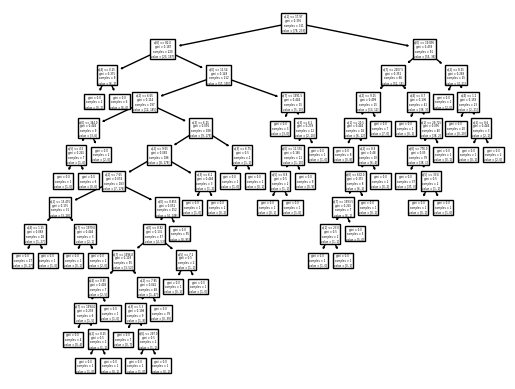

In [31]:
_ = tree.plot_tree(clf)

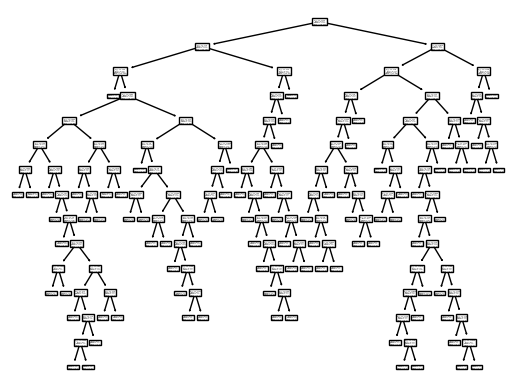

In [33]:
X = amazonbooks_selectfeatures_nonans[['Amazon Price',"Weight_oz"]]
Y = amazonbooks_selectfeatures_nonans.Hard_or_Paper
clf = clf.fit(X, Y)
_ = tree.plot_tree(clf)

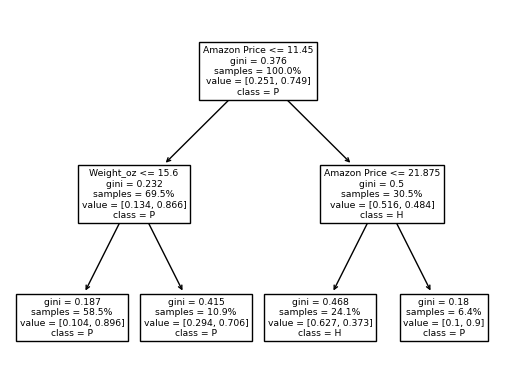

In [42]:
# I can control "model complexity" of the decision tree
# based on "hyperparameters" / "tuning parameters"
# such `max_depth`
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, Y)
_ = tree.plot_tree(clf, proportion=True,
                   feature_names=['Amazon Price',"Weight_oz"], class_names=['H','P'])
# x[0]: 'Amazon Price'
# x[1]: "Weight_oz"

# Class 0: H
# Class 1: P

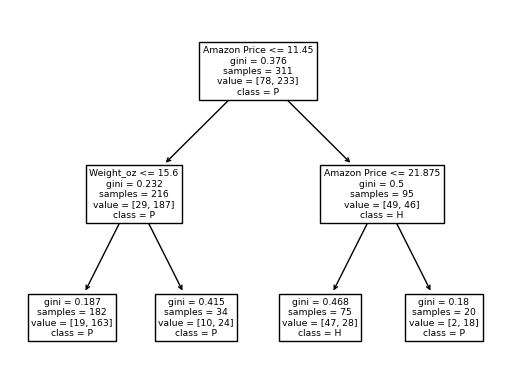

In [43]:
_ = tree.plot_tree(clf, feature_names=['Amazon Price',"Weight_oz"], class_names=['H','P'])

In [47]:
# The way we determine how good a fitted machine learning ML model is
# is by fitting the data with training data
# and seeing how good the model prediction is no new testing data (not used to fit the mode)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# powerful modularity/templating in sklearn
clf = tree.DecisionTreeClassifier(max_depth=2)# <- we chose this... 
                                              # instead of any other model we might choose, like SVC(...)#
clf = clf.fit(X_train, Y_train)
# I only fit the model with 80% of the data

In [48]:
clf.predict(X_test)

array(['P', 'H', 'P', 'P', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'H', 'P',
       'P', 'P', 'P', 'P', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'H', 'P', 'P', 'P', 'P', 'P', 'H', 'H', 'H', 'P', 'P', 'H',
       'P', 'P', 'P', 'P', 'H', 'P', 'P', 'H', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
      dtype=object)

In [49]:
Y_test

1      P
28     P
267    P
271    P
85     P
      ..
124    H
65     H
59     P
187    H
75     P
Name: Hard_or_Paper, Length: 63, dtype: object

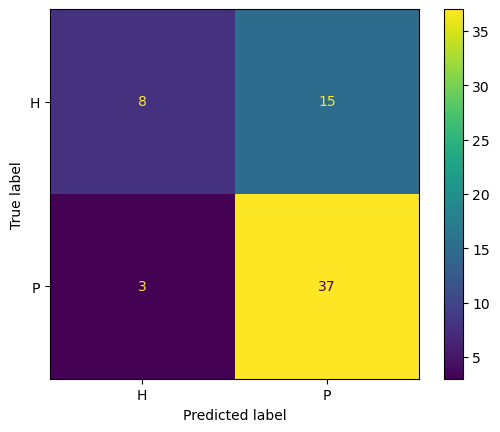

In [54]:
# A confusion matrix is a way to evaluate classification predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, clf.predict(X_test), labels=['H','P']),
                                 display_labels=['H','P'])
cm_disp.plot()
#plt.show()

- note the **class imbalance**: there are more P than H... 
    - and then we are inclined to predict more P than H...

# Confusion Matrices are often presented in terms of FP/FN(TP/TN)

|         |Pred H(-) |Pred P(+) |
|---------|----------|----------|
|True H(-)|TruNeg(TN)|FalsePositive(FP)|       
|True P(+)|FalsePositive(FN)|TuePos(TP)|

- **Sensitivity** [proportion of correct predictions in the positive class] : TP/(TP+FN), e.g., up above our sensitivity is 37/40=92.5% sensitivity
- **Specificity** [proportion of correct predictions in the negative class]: TN/(TN+FP), e.g., up above our specificity is 8/23=34.8% specificity
- **Accuracy** [overall proportion of correct predictions]: (TP+TN)/(TP+TN+FP+FN)[=N], e.g., up above our accurac is 71.4%

Note that these are "out of sample metrics" -- this is performance on test data -- not training used to fit the model (which would over optimistically estimate these metric scores)

In [57]:
37/40, 8/23, (8+37)/(8+37+3+15)

(0.925, 0.34782608695652173, 0.7142857142857143)

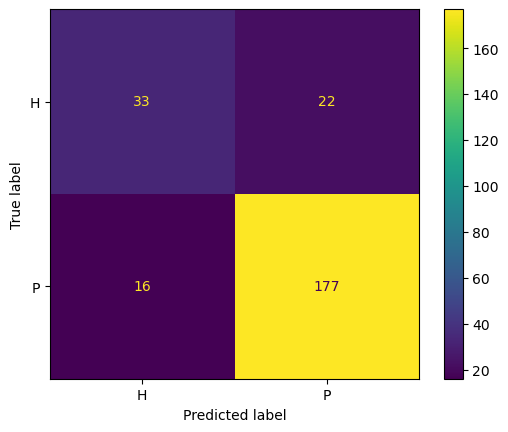

In [58]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix(Y_train, clf.predict(X_train), labels=['H','P']),
                                 display_labels=['H','P'])
cm_disp.plot()


- Sensitivity: 177/(177+16)=91.7%
- Specificity: 33/55=60%  
- Accuracy: 210/(210+16+22)=84.6%

In [61]:
177/(177+16), 33/55, 210/(210+16+22)

(0.917098445595855, 0.6, 0.8467741935483871)

In [92]:
# sklearn templating to explore/try different models (complexity) is excellent
from sklearn.model_selection import GridSearchCV

X = amazonbooks_selectfeatures_nonans.iloc[:,1:]
Y = amazonbooks_selectfeatures_nonans.Hard_or_Paper

clf_estimator = tree.DecisionTreeClassifier()
max_depth_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]} 

from sklearn.metrics import make_scorer,recall_score,accuracy_score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score,pos_label='P'),
    'specificity': make_scorer(recall_score,pos_label='H')
}
gridsearch_obj = GridSearchCV(clf_estimator, max_depth_grid, scoring=scoring, refit=False)
# we can control the kind of train-test split and evaluation that gets used
# e.g., up above we did cv=train_test_split(X, Y, test_size=0.2)
# but, I need to troubleshoot and figure out how to make the code do it, so I'm skipping for now

gridsearch_obj.fit(X,Y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15]},
             refit=False,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'sensitivity': make_scorer(recall_score, pos_label=P),
                      'specificity': make_scorer(recall_score, pos_label=H)})

In [93]:
gridsearch_obj.cv_results_

{'mean_fit_time': array([0.00192714, 0.00189934, 0.00210056, 0.00226536, 0.00232191,
        0.00235167, 0.00234551, 0.00241532, 0.00248685, 0.00239315,
        0.00238571, 0.00237951, 0.00240798, 0.00254173, 0.00237207]),
 'std_fit_time': array([2.39749768e-04, 1.44950653e-05, 2.58807074e-05, 8.00719631e-05,
        6.37498290e-05, 1.40327918e-05, 3.21118584e-05, 5.13495395e-05,
        1.95572864e-04, 2.37972796e-05, 6.04185986e-05, 4.01706935e-05,
        4.17863913e-05, 3.46111239e-04, 4.78874622e-05]),
 'mean_score_time': array([0.00401793, 0.00406837, 0.00399871, 0.00403795, 0.0039885 ,
        0.00407672, 0.00397415, 0.00403323, 0.00407419, 0.00404596,
        0.00391617, 0.00393085, 0.00401359, 0.00428157, 0.00391107]),
 'std_score_time': array([1.60496729e-04, 2.42948415e-04, 2.27078646e-05, 1.21871462e-04,
        5.21765320e-05, 1.60470051e-04, 3.59173930e-05, 1.04232349e-04,
        2.76685541e-04, 2.53910839e-04, 2.30631499e-05, 1.17526518e-04,
        2.06789625e-04, 4.61

In [73]:
clf

DecisionTreeClassifier(max_depth=2)

In [75]:
gridsearch_obj.best_params_

{'max_depth': 2}

In [76]:
gridsearch_obj.best_score_

0.8361495135688685

In [94]:
gridsearch_obj.best_estimator_
#_ = tree.plot_tree(gridsearch_obj.best_estimator_, feature_names=['Amazon Price',"Weight_oz"], class_names=['H','P'])

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [78]:
gridsearch_obj.best_estimator_.predict(X)

array(['P', 'P', 'P', 'P', 'H', 'H', 'H', 'P', 'H', 'P', 'P', 'H', 'H',
       'P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'H', 'P', 'H',
       'P', 'P', 'P', 'P', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'H',
       'P', 'P', 'H', 'H', 'P', 'P', 'P', 'P', 'P', 'H', 'P', 'P', 'H',
       'P', 'P', 'H', 'P', 'H', 'P', 'P', 'P', 'P', 'H', 'P', 'P', 'H',
       'P', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'H',
       'P', 'P', 'P', 'H', 'H', 'P', 'P', 'H', 'H', 'P', 'P', 'P', 'P',
       'P', 'H', 'H', 'P', 'P', 'P', 'P', 'H', 'P', 'H', 'H', 'P', 'P',
       'H', 'P', 'P', 'H', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'H',
       'P', 'P', 'P', 'H', 'P', 'H', 'H', 'P', 'P', 'P', 'H', 'P', 'P',
       'H', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'H', 'P', 'P', 'P', 'P',
       'P', 'P', 'P', 'P', 'P', 'P', 'P', 'H', 'P', 'P', 'H', 'P

In [80]:
dir(gridsearch_obj.best_estimator_)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'ma

In [85]:
_ = tree.plot_tree(gridsearch_obj.best_estimator_.tree_, feature_names=['Amazon Price',"Weight_oz"], class_names=['H','P'])


TypeError: <sklearn.tree._tree.Tree object at 0x7fd54bcd7600> is not an estimator instance.

In [35]:
# ! pip install graphviz # -- didn't end up being workable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 518.2 kB/s eta 0:00:00a 0:00:01


In [36]:
# wasn't able to get this working out of the box on UofT jupyterhub -- np
# import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("HorP") 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH